In [1]:
# packages
import pandas as pd
import numpy as np
import math
import pickle
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import fcluster, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from dtaidistance import dtw,similarity
from scipy.stats import pearsonr

from claspy.segmentation import BinaryClaSPSegmentation

import ruptures as rpt

import stumpy
from aeon.segmentation import find_dominant_window_sizes

from aeon.segmentation import GreedyGaussianSegmenter

from aeon.segmentation import InformationGainSegmenter

from aeon.anomaly_detection import STRAY

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, make_scorer,mean_squared_error
from ruptures.metrics import precision_recall
import matplotlib.pyplot as plt
#from aeon.visualisation import plot_series_with_change_points, plot_series_with_profiles
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

from claspy.tests.evaluation import f_measure,covering

from claspy.window_size import dominant_fourier_frequency, highest_autocorrelation, suss

C:\Users\tikyn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\aeon\base\__init__.py:24: FutureWarning: The aeon package will soon be releasing v1.0.0 with the removal of legacy modules and interfaces such as BaseTransformer and BaseForecaster. This will contain breaking changes. See aeon-toolkit.org for more information. Set aeon.AEON_DEPRECATION_WARNING or the AEON_DEPRECATION_WARNING environmental variable to 'False' to disable this warning.
  warnings.warn(


Extracted features. Use the index of this list to use with iloc[]
<ol start="0">
  <li>Kinetic Global</li>
  <li>Kinetic Chest</li>
  <li>Directness Head</li>
  <li>Density</li>
  <li>left wrist ke</li>
  <li>right wrist ke</li>
  <li>left ankle ke</li>
  <li>right ankle ke</li>
  <li>head ke</li>
  <li>crouch density</li>
  <li>left leg density</li>
  <li>right leg density</li>
  <li>left hand density</li>
  <li>right hand density</li>
  <li>head density</li>
  <li>arto inferiore</li>
  <li>gamba</li>
  <li>coscia</li>
  <li>coscia dx</li>
  <li>coscia sx</li>
  <li>gamba sx</li>
  <li>gamba dx</li>
  <li>braccio sx</li>
  <li>braccio dx</li>
  <li>avambraccio sx</li>
  <li>avambraccio dx</li>
  <li>ARIEL speed magnitude</li>
  <li>ARIEL speed X component</li>
  <li>ARIEL speed Y component</li>
  <li>ARIEL speed Z component</li>
  <li>ARIEL acceleration magnitude</li>
  <li>ARIEL acceleration X component</li>
  <li>ARIEL acceleration Y component</li>
  <li>ARIEL acceleration Z component</li>
  <li>ARIEL jerk magnitude</li>
  <li>ARIEL jerk X component</li>
  <li>ARIEL jerk Y component</li>
  <li>ARIEL jerk Z component</li>
  <li>STRN speed magnitude</li>
  <li>STRN speed X component</li>
  <li>STRN speed Y component</li>
  <li>STRN speed Z component</li>
  <li>STRN acceleration magnitude</li>
  <li>STRN acceleration X component</li>
  <li>STRN acceleration Y component</li>
  <li>STRN accelerationZ component</li>
  <li>STRN jerk magnitude</li>
  <li>STRN jerk X component</li>
  <li>STRN jerk Y component</li>
  <li>STRN jerk Z component</li>
  <li>RHEL speed magnitude</li>
  <li>RHEL speed X component</li>
  <li>RHEL speed Y component</li>
  <li>RHEL speed Z component</li>
  <li>RHEL acceleration magnitude</li>
  <li>RHEL acceleration X component</li>
  <li>RHEL acceleration Y component</li>
  <li>RHEL acceleration Z component</li>
  <li>RHEL jerk magnitude</li>
  <li>RHEL jerk X component</li>
  <li>RHEL jerk Y component</li>
  <li>RHEL jerk Z component</li>
  <li>LHEL speed magnitude</li>
  <li>LHEL speed X component</li>
  <li>LHEL speed Y component</li>
  <li>LHEL speed Z component</li>
  <li>LHEL acceleration magnitude</li>
  <li>LHEL acceleration X component</li>
  <li>LHEL acceleration Y component</li>
  <li>LHEL acceleration Z component</li>
  <li>LHEL jerk magnitude</li>
  <li>LHEL jerk X component</li>
  <li>LHEL jerk Y component</li>
  <li>LHEL jerk Z component</li>
  <li>RPLM speed magnitude</li>
  <li>RPLM speed X component</li>
  <li>RPLM speed Y component</li>
  <li>RPLM speed Z component</li>
  <li>RPLM acceleration magnitude</li>
  <li>RPLM acceleration X component</li>
  <li>RPLM acceleration Y component</li>
  <li>RPLM acceleration Z component</li>
  <li>RPLM jerk magnitude</li>
  <li>RPLM jerk X component</li>
  <li>RPLM jerk Y component</li>
  <li>RPLM jerk Z component</li>
  <li>LPLM speed magnitude</li>
  <li>LPLM speed X component</li>
  <li>LPLM speed Y component</li>
  <li>LPLM speed Z component</li>
  <li>LPLM acceleration magnitude</li>
  <li>LPLM acceleration X component</li>
  <li>LPLM acceleration Y component</li>
  <li>LPLM acceleration Z component</li>
  <li>LPLM jerk magnitude</li>
  <li>LPLM jerk X component</li>
  <li>LPLM jerk Y component</li>
  <li>LPLM jerk Z component</li>




</ol>

In [2]:
# list of features. To access its name or its value while using iloc
features_name=[
    "kinetic_global",
    "kinetic_chest",
    "directness_head",
    "density",
    "left_wrist_ke",
    "right_wrist_ke",
    "left_ankle_ke",
    "right_ankle_ke",
    "head_ke",
    "crouch_density",
    "left_leg_density",
    "right_leg_density",
    "left_hand_density",
    "right_hand_density",
    "head_density",
    "arto_inferiore",
    "gamba",
    "coscia",
    "coscia_dx",
    "coscia_sx",
    "gamba_sx",
    "gamba_dx",
    "braccio_sx",
    "braccio_dx",
    "avambraccio_sx",
    "avambraccio_dx",
    "ARIEL_speed_magnitude",
    "ARIEL_speed_X_component",
    "ARIEL_speed_Y_component",
    "ARIEL_speed_Z_component",
    "ARIEL_acceleration_magnitude",
    "ARIEL_acceleration_X_component",
    "ARIEL_acceleration_Y_component",
    "ARIEL_acceleration_Z_component",
    "ARIEL_jerk_magnitude",
    "ARIEL_jerk_X_component",
    "ARIEL_jerk_Y_component",
    "ARIEL_jerk_Z_component",
    "STRN_speed_magnitude",
    "STRN_speed_X_component",
    "STRN_speed_Y_component",
    "STRN_speed_Z_component",
    "STRN_acceleration_magnitude",
    "STRN_acceleration_X_component",
    "STRN_acceleration_Y_component",
    "STRN_acceleration_Z_component",
    "STRN_jerk_magnitude",
    "STRN_jerk_X_component",
    "STRN_jerk_Y_component",
    "STRN_jerk_Z_component",
    "RHEL_speed_magnitude",
    "RHEL_speed_X_component",
    "RHEL_speed_Y_component",
    "RHEL_speed_Z_component",
    "RHEL_acceleration_magnitude",
    "RHEL_acceleration_X_component",
    "RHEL_acceleration_Y_component",
    "RHEL_acceleration_Z_component",
    "RHEL_jerk_magnitude",
    "RHEL_jerk_X_component",
    "RHEL_jerk_Y_component",
    "RHEL_jerk_Z_component",
    "LHEL_speed_magnitude",
    "LHEL_speed_X_component",
    "LHEL_speed_Y_component",
    "LHEL_speed_Z_component",
    "LHEL_acceleration_magnitude",
    "LHEL_acceleration_X_component",
    "LHEL_acceleration_Y_component",
    "LHEL_acceleration_Z_component",
    "LHEL_jerk_magnitude",
    "LHEL_jerk_X_component",
    "LHEL_jerk_Y_component",
    "LHEL_jerk_Z_component",
    "RPLM_speed_magnitude",
    "RPLM_speed_X_component",
    "RPLM_speed_Y_component",
    "RPLM_speed_Z_component",
    "RPLM_acceleration_magnitude",
    "RPLM_acceleration_X_component",
    "RPLM_acceleration_Y_component",
    "RPLM_acceleration_Z_component",
    "RPLM_jerk_magnitude",
    "RPLM_jerk_X_component",
    "RPLM_jerk_Y_component",
    "RPLM_jerk_Z_component",
    "LPLM_speed_magnitude",
    "LPLM_speed_X_component",
    "LPLM_speed_Y_component",
    "LPLM_speed_Z_component",
    "LPLM_acceleration_magnitude",
    "LPLM_acceleration_X_component",
    "LPLM_acceleration_Y_component",
    "LPLM_acceleration_Z_component",
    "LPLM_jerk_magnitude",
    "LPLM_jerk_X_component",
    "LPLM_jerk_Y_component",
    "LPLM_jerk_Z_component",
]

In [3]:
def f1scoremargin(ground_truth, predictions, tolerance):
    """
    Calcola l'F1 score con una finestra di tolleranza sui change points.
    
    :param ground_truth: Lista o array di change points reali
    :param predictions: Lista o array di change points predetti
    :param tolerance: La tolleranza temporale (numero di unità temporali)
    :return: precision, recall, f1-score
    """
    ground_truth = np.array(ground_truth)
    predictions = np.array(predictions)
    
    # Vettori per tracciare quali punti sono stati già associati
    matched_ground_truth = np.zeros(len(ground_truth), dtype=bool)
    matched_predictions = np.zeros(len(predictions), dtype=bool)

    mgt={key: False for key in ground_truth}
    mcp={key: False for key in predictions}
    #print(f'gt:{len(ground_truth)} - cp:{len(predictions)}')
    # True Positives (TP)
    tp = 0
    for i, gt_point in enumerate(ground_truth):
        for j, pred_point in enumerate(predictions):
            
            if not matched_predictions[j] and abs(gt_point - pred_point) <= tolerance:
                tp += 1
                matched_ground_truth[i] = True
                matched_predictions[j] = True

                mgt[gt_point] = True
                mcp[pred_point] = True
                break
            
    
    # False Positives (FP) - predizioni non corrispondenti a nessun ground truth entro la tolleranza
    fp = np.sum(~matched_predictions)
    
    # False Negatives (FN) - punti del ground truth non corrispondenti a nessuna predizione entro la tolleranza
    fn = np.sum(~matched_ground_truth)
    #print(f'tp:{tp} - fp:{fp} - fn:{fn}')
    #print(mgt)
    #print(mcp)
    # Calcolo di precision, recall e F1-score
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    #print(f'gt:{len(ground_truth)} cp:{len(predictions)} tp:{tp} fp:{fp} fn:{fn}')
    return precision, recall, f1, {"tp":tp, "fp":fp, "fn":fn}

In [4]:
def ReadAndPreProcess(inputDataRaw):
    # lettura
    df=pd.read_csv(inputDataRaw,sep=' ', header=None).interpolate()
    
    df=df.drop(0, axis=1)
    df=df.drop_duplicates()
    df = df.iloc[:, ::-1]
 

    return df

In [5]:
# questa funzione ritorna un dataframe del groundtruth che viene usato specificatamente per visualizzare il gt
# è soggetto a un preprocessing dei dati siccome l'ultimo groundtruth è dove termina il ts del gt
# di conseguenza per farlo corrispondere, bisogna stretcharlo
# ma ricordo di aver rifatti i dati nuovi per generare un groundtruth a fine ts, da controllare cosi che non serve stretcharlo?
def LoadingGroundTruth(df,gtraw):
    gt=pd.read_csv(gtraw,sep=' ', header=None)
    gt=gt.iloc[:,0].values
    #stretching dei dati se necessario per farlo corrispondere alla ts dei dati
    stretch_gt = np.array([])
    for idx,i in enumerate(gt):
        relpos = len(df)*i/gt[-1]
        stretch_gt = np.append(stretch_gt,relpos)

    # eliminiamo l'ultimo elemento che è stato annotato solo per delimitare la lunghezza della gt simile alla ts
    
    return stretch_gt[:-1]

In [6]:
def GetClasp2(df,gt,known,feature, **kwargs):
    
    result=np.array([])
    eachresult = []
    eachclasp=[]
    for i in feature:
    
        ts=df.iloc[:,i]
        
        #print(ts.head())
        if known == 1:
            #print("knwon!")
            clasp = BinaryClaSPSegmentation(n_segments=len(gt), validation=None)
        else:
            #print("unknown!")
            clasp = BinaryClaSPSegmentation(**kwargs)
            
        found_cps = clasp.fit_predict(ts.values)    

        # c'è un bug con binseg dove un cp è oltre la lunghezza del ts
        # faccio un loop e se eccede cambio il valore con la len(tf)-1
        # WTF IS THIS
        """
        for i in range(0,len(found_cps)):
            if found_cps[i] >= len(ts):
                found_cps[i] = len(ts)-1
        """
        # per ogni array di cp di ogni singola feature
        # li unisco in un unico array. in pratica faccio un OR di tutti i cp
        result = np.sort(np.append(result,found_cps).flatten())
        #potenziale bug.
        #se faccio unique() mi toglie il numero di cp in un punto e quando faccio majority voting mi si toglie
        result = np.unique(result)
        eachresult.append(found_cps)
        eachclasp.append(clasp)
        
        

        
    return result, eachresult, eachclasp

In [7]:
# utilizzo CLASP 
# prende come parametro un dataframe e restituisce il clasp score
# gt e known vengono usati per usare il numero vero di cp se uguale a 1 sennò si cerca di predirlo se il modello lo permette
def GetClasp3(df,gt,known,feature, **kwargs):
    
    result=np.array([])
    eachresult = []
    eachclasp=[]
    for i in [feature]:
    
        ts=df.iloc[:,i]
        
        #print(ts.head())
        if known == 1:
            #print("knwon!")
            clasp = BinaryClaSPSegmentation(n_segments=len(gt), validation=None)
        else:
            #print("unknown!")
            clasp = BinaryClaSPSegmentation(**kwargs)
            
        found_cps = clasp.fit_predict(ts.values)    

        # c'è un bug con binseg dove un cp è oltre la lunghezza del ts
        # faccio un loop e se eccede cambio il valore con la len(tf)-1
        # WTF IS THIS
        """
        for i in range(0,len(found_cps)):
            if found_cps[i] >= len(ts):
                found_cps[i] = len(ts)-1
        """

        # per ogni array di cp di ogni singola feature
        # li unisco in un unico array. in pratica faccio un OR di tutti i cp
        result = np.sort(np.append(result,found_cps).flatten())
        result = np.unique(result)
        eachresult.append(found_cps)
        eachclasp.append(clasp)
        
        

        
    return result, eachresult, eachclasp

In [8]:
# utilizzo CLASP 
# prende come parametro un dataframe e restituisce il clasp score
# gt e known vengono usati per usare il numero vero di cp se uguale a 1 sennò si cerca di predirlo se il modello lo permette
def GetClasp(df,gt,known, **kwargs):
    
    result=np.array([])
    eachresult = []
    eachclasp=[]
    for i in range(0,len(features_name)):
    
        ts=df.iloc[:,i]
        
        #print(ts.head())
        if known == 1:
            #print("knwon!")
            clasp = BinaryClaSPSegmentation(n_segments=len(gt), validation=None)
        else:
            #print("unknown!")
            clasp = BinaryClaSPSegmentation(**kwargs)
            
        found_cps = clasp.fit_predict(ts.values)    

        # c'è un bug con binseg dove un cp è oltre la lunghezza del ts
        # faccio un loop e se eccede cambio il valore con la len(tf)-1
        # WTF IS THIS
        """
        for i in range(0,len(found_cps)):
            if found_cps[i] >= len(ts):
                found_cps[i] = len(ts)-1
        """
        # per ogni array di cp di ogni singola feature
        # li unisco in un unico array. in pratica faccio un OR di tutti i cp
        result = np.sort(np.append(result,found_cps).flatten())
        result = np.unique(result)
        eachresult.append(found_cps)
        eachclasp.append(clasp)
        
        

        
    return result, eachresult, eachclasp
        
    


In [32]:
def PlotResult(df,gt,cp, nomeFile, margin,clasplist,ts):
    #da testare quando ho piu valori
    #clasp.plot(gt_cps=gt.astype(int), heading="Segmentation of different umpire cricket signals", ts_name="ACC", file_path="segmentation_example.png")
    if nomeFile == "rplm":
        excl=[0,1,2,3,5,6,7,8,9,12,13,14,15,16]
    elif nomeFile == "ariel":
        excl=[8,9,12]
    elif nomeFile == "lplm":
        excl=[0,1,4,5,6,8,9,10,11,12,15,16]
    elif nomeFile == "rhel":
        excl=[16,17]
    elif nomeFile == "strn":
        excl=[8,9,12,16,17]
    else:
        excl=[]
    plt.figure(figsize=(18,9))
    plt.plot(np.arange(len(df.iloc[:,ts].values)),df.iloc[:,ts].values,'blue',linewidth=0.5)
    for j in cp.tolist():
        plt.axvline(x = j, color = 'red',linewidth=1,linestyle="-.",alpha=0.5) 
    for idx,i in enumerate(gt.astype(int)):
    
        if idx in excl:
            plt.axvline(x = i, color = 'green',linewidth=1) 
        else:
            plt.axvline(x = i, color = 'green',linewidth=1,linestyle="-.",alpha=0.5) 
            
    

    for k in gt.astype(int):
        plt.fill_betweenx(np.array([0, 1]), k-margin, k+margin, color='green', alpha=0.3)
    plt.xlabel(f'{nomeFile} {clasplist} {f1scoremargin(gt.astype(int),cp.astype(int),margin)}')

    #plt.figure(figsize=(18,9))

 



In [10]:
def PlotResultColored(df,gt,cp, colored, nomeFile, margin,clasplist,ts):
    #da testare quando ho piu valori
    #clasp.plot(gt_cps=gt.astype(int), heading="Segmentation of different umpire cricket signals", ts_name="ACC", file_path="segmentation_example.png")
    
    plt.figure(figsize=(18,9))
    plt.plot(np.arange(len(df.iloc[:,ts].values)),df.iloc[:,ts].values,'blue',linewidth=0.5)
    for idx,j in enumerate(cp.tolist()):
        if idx in colored:
            plt.axvline(x = j, color = 'red',linewidth=2) 
        else:
            plt.axvline(x = j, color = 'green',linewidth=2) 
    for idx,i in enumerate(gt.astype(int)):
        
        plt.axvline(x = i, color = 'blue',linewidth=1,linestyle="-.",alpha=1) 
            
    

    for k in gt.astype(int):
        plt.fill_betweenx(np.array([0, 1]), k-margin, k+margin, color='green', alpha=0.3)
    plt.xlabel(f'{nomeFile} {clasplist} {f1scoremargin(gt.astype(int),cp.astype(int),margin)}')

    #plt.figure(figsize=(18,9))

In [11]:
def Plotclasp(eachclasp,gt,margin,eachcp,feature_list):
    #print("idx"+str(asd))
    
    for idx,clasp in enumerate(eachclasp):
        print(features_name[feature_list[idx]])
        clasp.plot(gt_cps=gt.astype(int), heading=f'f1margin: {f1scoremargin(gt.astype(int),eachcp[idx].astype(int),margin)}')
        #clasp.plot(gt_cps=None, heading=f'f1margin: {f1scoremargin(gt.astype(int),eachcp[idx].astype(int),margin)}', ts_name="suss")


        plt.xlabel(features_name[feature_list[idx]])
        for idx2,j in enumerate(gt.astype(int)):
            plt.fill_betweenx(np.array([0, 1]), j-margin, j+margin, color='green', alpha=0.3)

        


In [12]:
# calcola i vari scores dati il groundtruth e il prediction
# puo salvare il risultato su file per evitare di perderli
# prende come parametro nome del groundtruth, groundtruth, nome della timeseries e il prediction
def Evaluate(modelName,gtName, gt, tsName, cp, df, margin):
    # creo dei array di lunghezza come la ts cosi possono fare il confronto
    # sia per il gt che per il pd
  
    cpnump = np.array(cp)
    gtnump = np.array(gt)

    cp_long = np.zeros(len(df)+1)
    cp_long[cpnump.astype(int)]=1

    gt_long = np.zeros(len(df)+1)
    gt_long[gtnump.astype(int)]=1

    # calcolo lo score 
    print(f'f1margin: {f1scoremargin(gt.astype(int),cp.astype(int),margin)}')
    return f1scoremargin(gt.astype(int),cp.astype(int),margin)
    

In [13]:
def IgnoreZone(idx,cpraw,gt):
    cp = cpraw.tolist()
    if idx == 0: #cora1
        for i in range(len(cp)-1, -1, -1):
            #if cp[i] > 3944.7118557910376+100 and cp[i] < 5911.693516853054-100 or cp[i] > 12845.0+100:
            if cp[i] > gt[18]+100 and cp[i] < gt[19]-100 or cp[i]> gt[-1]+100:
                cp.pop(i)
                
        
    elif idx == 1: #cora4_05
        for i in range(len(cp)-1, -1, -1):
            #if cp[i]< 969.6180827886711-100 and cp[i] > 13125.469063180826+100:
            if cp[i] < gt[0]-100 or cp[i] > gt[-1]+100:
                cp.pop(i)
    elif idx == 2: #cora4_08
        for i in range(len(cp)-1, -1, -1):
            #if cp[i] > 2874.607407407407+100 and cp[i] < 4016.935849056604-100:
            if cp[i] > gt[-2]+100 and cp[i] < gt[-1]-100:
                cp.pop(i)

    elif idx == 17: #muriel18
        for i in range(len(cp)-1, -1, -1):
            #if cp[i] > 180.03455207940698+100 and cp[i] < 1227.051137077522-100 or cp[i] > 5865.505591154668+100:
            if cp[i] > gt[0]+100 and cp[i] < gt[1]-100 or cp[i] > gt[-1]+100:
                cp.pop(i)

    elif idx == 18: #muriel26
        for i in range(len(cp)-1, -1, -1):
            #if cp[i] > 138.33224102186853+100 and cp[i] < 3677.231833076974-100:
            if cp[i] > gt[0]+100 and cp[i] < gt[1]-100:
                cp.pop(i)


    elif idx == 21: #muriel30
        for i in range(len(cp)-1, -1, -1):
            #if cp[i] > 8187.634803581529+100:
            if cp[i] > gt[26]+100 and cp[i] < gt[27]-100 or cp[i] > gt[-1]+100:
                cp.pop(i)


    else:
        pass
        #print("error IgnoreZone()")
    return np.array(cp)

In [14]:
def delnear(arr,range):
    i = 0
    while i < len(arr) - 1:
        # Iniziamo con il primo elemento di un potenziale gruppo
        gruppo_inizio = i
        gruppo_fine = i

        # Cerca gli elementi che fanno parte dello stesso gruppo
        while gruppo_fine < len(arr) - 1 and arr[gruppo_fine + 1] - arr[gruppo_fine] < range:
            gruppo_fine += 1

        # Se esiste un gruppo di più elementi
        if gruppo_fine > gruppo_inizio:
            # Se la distanza tra l'inizio e la fine è minore di 50, elimina l'elemento maggiore (gruppo_fine)
            if arr[gruppo_fine] - arr[gruppo_inizio] < range:
                arr = np.delete(arr, gruppo_fine)
            
            # Elimina tutti gli elementi interni al gruppo
            arr = np.concatenate((arr[:gruppo_inizio + 1], arr[gruppo_fine:]))

        # Procedi con il prossimo gruppo
        i = gruppo_inizio + 1

    return arr

In [15]:
def MajorityVoteCP(arr,margin,amount):
    if len(arr)==0:
        return np.array([])
    # se vicino continua ad aggiungere

    # se lontano e bucket presente, generare medio

    # se lontano e bucket vuoto aggiornare start
    bucket=[]
    answer=[]

    for i in range(len(arr)-1,-1,-1):
        if bucket == []:
            bucket.append(arr[i])
        elif abs(arr[i]-bucket[-1]) <= margin:
            bucket.append(arr[i])
        elif abs(arr[i]-bucket[-1]) > margin:
            if len(bucket) < amount:
                bucket=[arr[i]]
            else:
                summ=0
                for j in bucket:
                    summ+=j
                answer.append(summ/len(bucket))
                bucket=[arr[i]]
    if len(bucket) < amount:
        bucket=[]
    else:
        summ=0
        for j in bucket:
            summ+=j
        answer.append(summ/len(bucket))
        bucket=[]
    return np.array(answer)


    

In [16]:
timeseries=[
    "in\cora1_in.txt",
      "in\cora4_05_in.txt",
      "in\cora4_08_in.txt",
      "in\cora5_in.txt",
      "in\cora14_in.txt",
      "in\marianne7_in.txt",
      "in\marianne8_in.txt",
      "in\marianne10_in.txt",
      "in\marianne18_in.txt",
      "in\marianne19_in.txt",
      "in\marianne24_in.txt",
      "in\marianne26_in.txt",
      "in\marianne41_in.txt",
      "in\marianne42_in.txt",
      "in\marianne43_in.txt",
      "in\marianne47_in.txt",
      "in\marianne48_in.txt",
      "in\muriel18_in.txt",
      "in\muriel26_in.txt",
      "in\muriel27_in.txt",
      "in\muriel30_in.txt"

      ]
groundtruth=[
         "gt\cora_gt_2019-08-08_t001_video01.txt",
         "gt\cora_gt_2019-05-22_t004_video01.txt",
         "gt\cora_gt_2019-08-08_t004_video01.txt",
         "gt\cora5_gt.txt",
         "gt\cora_gt_2019-08-08_t014_video01.txt",
         "gt\marianne_gt_2016-03-22_t007_video01.txt",
         "gt\marianne_gt_2016-03-22_t008_video01.txt",
         "gt\marianne_gt_2016-03-22_t010_video01.txt",
         "gt\marianne_gt_2016-03-22_t018_video01.txt",
         "gt\marianne_gt_2016-03-22_t019_video01.txt",
         "gt\marianne_gt_2016-03-22_t024_video01.txt",
         "gt\marianne_gt_2016-03-22_t026_video01.txt",
         "gt\marianne_gt_2016-03-22_t041_video01.txt",
         "gt\marianne_gt_2016-03-22_t042_video01.txt",
         "gt\marianne_gt_2016-03-22_t043_video01.txt",
         "gt\marianne_gt_2016-03-22_t047_video01.txt",
         "gt\marianne_gt_2016-03-22_t048_video01.txt",
         "gt\muriel_gt_2016-03-21_t018_video01.txt",
         "gt\muriel_gt_2016-03-21_t026_video01.txt",
         "gt\muriel_gt_2016-03-21_t027_video01.txt",
         "gt\muriel_gt_2016-03-23_t030_video01.txt"
         ]



with open("dfl.pkl", "wb") as f:
    pickle.dump(dfl, f)

with open("gtl.pkl", "wb") as f:
    pickle.dump(gtl, f)

with open("cpsl.pkl", "wb") as f:
    pickle.dump(cpsl, f)

In [17]:

with open("../dfl.pkl", "rb") as f:
    dfl = pickle.load(f)

with open("../gtl.pkl", "rb") as f:
    gtl = pickle.load(f)

#suss
with open("../cpsl.pkl", "rb") as f:
    cpsl = pickle.load(f)

#window 50
with open("../cpsl50.pkl", "rb") as f:
    cpsl_50 = pickle.load(f)

#normalization euclidean clasp
with open("../dfl_no.pkl", "rb") as f:
    dfl_no = pickle.load(f)
with open("../cpsl_no.pkl", "rb") as f:
    cpsl_no = pickle.load(f)

#normalization zeuclidean clasp
with open("../cpsl_no_z.pkl", "rb") as f:
    cpsl_no_z = pickle.load(f)

#standardization euclidean clasp
with open("../dfl_st.pkl", "rb") as f:
    dfl_st = pickle.load(f)
with open("../cpsl_st.pkl", "rb") as f:
    cpsl_st = pickle.load(f)
    

#standardization zeuclidean clasp
with open("../cpsl_st_z.pkl", "rb") as f:
    cpsl_st_z = pickle.load(f)
    

    

<b>Questo serve per calcolare i nuovi prediction e salvarli nel file</b>

# compute all cp for all timeseries, so later we can use it freely
dfl_st_z=[]
gtl_st_z=[]
cpsl_st_z=[]
for i in range(len(timeseries)):
    print(f'PRIMO LOOP:{i}/{len(timeseries)}')
    df_raw=ReadAndPreProcess(timeseries[i])
    scaler = StandardScaler()
    df_scaler = scaler.fit_transform(df_raw)
    df = pd.DataFrame(df_scaler)

    gt=LoadingGroundTruth(df,groundtruth[i])
    cp_all,cps,clasp=GetClasp2(df,gt,0,list(range(len(features_name))), window_size=50,distance="znormed_euclidean_distance",n_jobs=6)
    dfl_st_z.append(df)
    gtl_st_z.append(gt)
    cpsl_st_z.append(cps)

with open("dfl_st_z.pkl", "wb") as f:
    pickle.dump(dfl_st_z, f)

with open("gtl_st_z.pkl", "wb") as f:
    pickle.dump(gtl_st_z, f)

with open("cpsl_st_z.pkl", "wb") as f:
    pickle.dump(cpsl_st_z, f)

print("COMPLETATO PRIMA PARTE")

# compute all cp for all timeseries, so later we can use it freely
dfl_no_z=[]
gtl_no_z=[]
cpsl_no_z=[]
for i in range(len(timeseries)):
    print(f'SECONDO LOOP:{i}/{len(timeseries)}')
    df_raw=ReadAndPreProcess(timeseries[i])
    normalizer = MinMaxScaler()
    df_normalizer = normalizer.fit_transform(df_raw)
    df=pd.DataFrame(df_normalizer)
    gt=LoadingGroundTruth(df,groundtruth[i])
    cp_all,cps,clasp=GetClasp2(df,gt,0,list(range(len(features_name))), window_size="suss",distance="znormed_euclidean_distance",n_jobs=6)
    dfl_no_z.append(df)
    gtl_no_z.append(gt)
    cpsl_no_z.append(cps)

with open("dfl_no_z.pkl", "wb") as f:
    pickle.dump(dfl_no_z, f)

with open("gtl_no_z.pkl", "wb") as f:
    pickle.dump(gtl_no_z, f)

with open("cpsl_no_z.pkl", "wb") as f:
    pickle.dump(cpsl_no_z, f)

In [18]:
# Dato una serie di cp, li combina in uno e fa il majority voting
def AndSal(margin,majvote,*args):
    result=np.array([])
 
    for cp in args:
        result = np.append(result,cp).flatten()
    result = np.sort(result)
    result = MajorityVoteCP(result,margin,majvote)
    return result


In [19]:
# combina le 3 componenti x,y,z insieme e poi fa un majority voting con tutte le altre feature in lista
def ComputeSaliency(cps,val,*vallist):
    vel=[cps[val[1]],cps[val[2]],cps[val[3]]]
    cp1 = AndSal(100,1,*vel)
    #cp1 = AndSal(100,1,cp,cps[val[0]])

    acc_c=[cps[val[5]],cps[val[6]],cps[val[7]]]
    cp2 = AndSal(100,1,*acc_c)
    #cp2 = AndSal(100,1,cp,cps[val[4]])

    jerk_c=[cps[val[9]],cps[val[10]],cps[val[11]]]
    cp3 = AndSal(100,1,*jerk_c)
    #cp3 = AndSal(100,1,cp,cps[val[8]])
    tot=[cp1,cp2,cp3,cps[val[0]],cps[val[4]],cps[val[8]]]#,cps[val[12]],cps[val[13]],cps[val[14]],cps[val[15]]]
    for i in vallist:
        tot.append(cps[i])
    result = AndSal(100,2,*tot)
   # print(f'mlor:{math.floor(len(tot)/2)+1}')
    #PlotResult(df,gt,result,name,100,"")
    return result

In [20]:
def UnionCP(cps,*val):
    res=np.array([])
    for i in val:
        res = np.append(res,cps[i]).flatten()
    return np.sort(res)

In [21]:
def UnionCPS(*val):
    res=np.array([])
    for i in val:
        res = np.append(res,i).flatten()
    return np.sort(res)

In [22]:
# esperimento dove prima combino i componenti x,y,z con il loro modulo
# poi essi vengono presi e combinati con le feature rimanenti
delnear_am=[]
majority_am=[]
cleaned_array = [s[3:-7] for s in timeseries]
resexcel=pd.DataFrame()
resexcel["name"] = cleaned_array
am=0
delnear_score=[]
majority_score=[]

    

 
for k in range(1,5):
    for h in range(1,4):
       
        neg=0
        f1_list=[]
        for i in range(len(timeseries)):
            
            # prendo i dati per il singolo video
            df=dfl[i]
            gt=gtl[i]
            cps=np.array(cpsl[i],dtype="object")


            vel=cps[[26,27,28,29]]
            acc=cps[[30,31,32,33]]
            jerk=cps[[34,35,36,37]]
            ariel = AndSal(100,h,*AndSal(100,k,*vel),*AndSal(100,k,*acc),*AndSal(100,k,*jerk),UnionCP(cps,2,8,14))
            #PlotResult(df,gt,ariel,"ariel",100,"",8)

            vel=cps[[38,39,40,41]]
            acc=cps[[42,43,44,45]]
            jerk=cps[[46,47,48,49]]
            strn = AndSal(100,h,*AndSal(100,k,*vel),*AndSal(100,k,*acc),*AndSal(100,k,*jerk),UnionCP(cps,1,9))
            #PlotResult(df,gt,strn,"strn",100,"",3)
            
            vel=cps[[50,51,52,53]]
            acc=cps[[54,55,56,57]]
            jerk=cps[[58,59,60,61]]
            rhel=AndSal(100,h,*AndSal(100,k,*vel),*AndSal(100,k,*acc),*AndSal(100,k,*jerk),UnionCP(cps,7,11,18,21))
            #PlotResult(df,gt,rhel,"rhel2",100,"",7)

            vel=cps[[62,63,64,65]]
            acc=cps[[66,67,68,69]]
            jerk=cps[[70,71,72,73]]
            lhel=AndSal(100,h,*AndSal(100,k,*vel),*AndSal(100,k,*acc),*AndSal(100,k,*jerk),UnionCP(cps,6,10,19,20))
            #PlotResult(df,gt,lhel,"lhel",100,"",19)

            vel=cps[[74,75,76,77]]
            acc=cps[[78,79,80,81]]
            jerk=cps[[82,83,84,85]]
            rplm=AndSal(100,h,*AndSal(100,k,*vel),*AndSal(100,k,*acc),*AndSal(100,k,*jerk),UnionCP(cps,5,13,23,25))
            #PlotResult(df,gt,rplm,"rplm",100,"",3)

            vel=cps[[86,87,88,89]]
            acc=cps[[90,91,92,93]]
            jerk=cps[[94,95,96,97]]
            lplm=AndSal(100,h,*AndSal(100,2,*vel),*AndSal(100,2,*acc),*AndSal(100,2,*jerk),UnionCP(cps,4,12,22,24))
            #PlotResult(df,gt,lplm,"lplm",100,"",3)

            # unisco il tutto in un unico array
            final = UnionCPS(ariel,strn,rhel,lhel,rplm,lplm)
            final = delnear(final,100)
            final = IgnoreZone(i,final,gt)

            _,_,f1,_=f1scoremargin(gt,final,100)
            if f1 < 0.5:
                neg+=1
            f1_list.append(f1)

        print(f'h:{h} k:{k} neg:{neg} mean:{sum(f1_list)/len(f1_list)} max:{max(f1_list)} min:{min(f1_list)}')
    

h:1 k:1 neg:2 mean:0.6645183189987532 max:0.9090909090909091 min:0.2173913043478261
h:2 k:1 neg:8 mean:0.5183957550212389 max:0.7586206896551724 min:0.13953488372093023
h:3 k:1 neg:15 mean:0.3789018571929985 max:0.6052631578947368 min:0.08695652173913042
h:1 k:2 neg:3 mean:0.6320254928337227 max:0.84375 min:0.2380952380952381
h:2 k:2 neg:12 mean:0.4385860521675007 max:0.6415094339622642 min:0.08695652173913042
h:3 k:2 neg:17 mean:0.2970850394503653 max:0.6382978723404256 min:0.08695652173913042
h:1 k:3 neg:3 mean:0.6212925325552737 max:0.7936507936507936 min:0.26086956521739135
h:2 k:3 neg:13 mean:0.4261730884651667 max:0.6153846153846154 min:0.08695652173913042
h:3 k:3 neg:19 mean:0.2810721675753351 max:0.6222222222222222 min:0.08695652173913042
h:1 k:4 neg:3 mean:0.6208920689212054 max:0.7936507936507936 min:0.26666666666666666
h:2 k:4 neg:13 mean:0.417943120264393 max:0.6153846153846154 min:0.08695652173913042
h:3 k:4 neg:20 mean:0.275818683724902 max:0.6363636363636364 min:0.086956

In [23]:
# esperimento dove faccio un majority voting tra le feature e poi un delnear 
# da questo esperimento si evince che basta solo raggruppare nelle zone di densità maggiore le prediction
# andando a considerare tutti
for div in range(0,10):
    neg=0
    f1_list=[]
    for i in range(0,len(dfl)):
        
        df=dfl[i]
        gt=gtl[i]
        cps=np.array(cpsl[i],dtype="object")

        ariel_el=[26,27,28,29,30,31,32,33,34,35,36,37,2,8,14]
        ariel = UnionCPS(*cps[ariel_el])


        strn_el=[38,39,40,41,42,43,44,45,46,47,48,49,1,9]
        strn = UnionCPS(*cps[strn_el])

        rhel_el=[50,51,52,53,54,55,56,57,58,59,60,61,7,11,18,21]
        rhel = UnionCPS(*cps[rhel_el])

        lhel_el=[6,10,19,20,62,63,64,65,66,67,68,69,70,71,72,73]
        lhel = UnionCPS(*cps[lhel_el])
        
        rplm_el=[74,75,76,77,78,79,80,81,82,83,84,85,5,13,23,25]
        rplm = UnionCPS(*cps[rplm_el])

        lplm_el=[4,12,22,24,86,87,88,89,90,91,92,93,94,95,96,97]
        lplm = UnionCPS(*cps[lplm_el])
    
      
        ariel = MajorityVoteCP(ariel,100,div)#math.ceil(len(ariel_el)/div))
        strn = MajorityVoteCP(strn,100,div)#math.ceil(len(strn_el)/div))
        rhel = MajorityVoteCP(rhel,100,div)#math.ceil(len(rhel_el)/div))
        lhel = MajorityVoteCP(lhel,100,div)#math.ceil(len(lhel_el)/div))
        rplm = MajorityVoteCP(rplm,100,div)#math.ceil(len(rplm_el)/div))
        lplm = MajorityVoteCP(lplm,100,div)#math.ceil(len(lplm_el)/div))
        res = UnionCPS(ariel,strn,rhel,lhel,rplm,lplm)
        res = IgnoreZone(i,res,gt)
        res = delnear(res,100)
        _,_,f1,_=f1scoremargin(gt,res,100)
        if f1 < 0.5:
            neg+=1
        f1_list.append(f1)
        #print(f'{timeseries[i]} f1:{f1}')
    print(f'neg:{neg} div:{div} mean:{sum(f1_list)/len(f1_list)}')
    
    """
    PlotResult(df,gt,ariel,"ariel",100,"",3)
    PlotResult(df,gt,strn,"strn",100,"",3)
    PlotResult(df,gt,rhel,"rhel",100,"",3)
    PlotResult(df,gt,lhel,"lhel",100,"",3)
    PlotResult(df,gt,rplm,"rplm",100,"",3)
    PlotResult(df,gt,lplm,"lplm",100,"",3)
    PlotResult(df,gt,res,"res",100,"",3)
    """

neg:3 div:0 mean:0.6661371027868397
neg:3 div:1 mean:0.6661371027868397
neg:6 div:2 mean:0.5367671597024232
neg:13 div:3 mean:0.42687843325663666
neg:16 div:4 mean:0.3600417715148632
neg:16 div:5 mean:0.32096948365131606
neg:16 div:6 mean:0.28225218243412753
neg:18 div:7 mean:0.24718843381081074
neg:19 div:8 mean:0.22702355377116587
neg:19 div:9 mean:0.19772860182451257


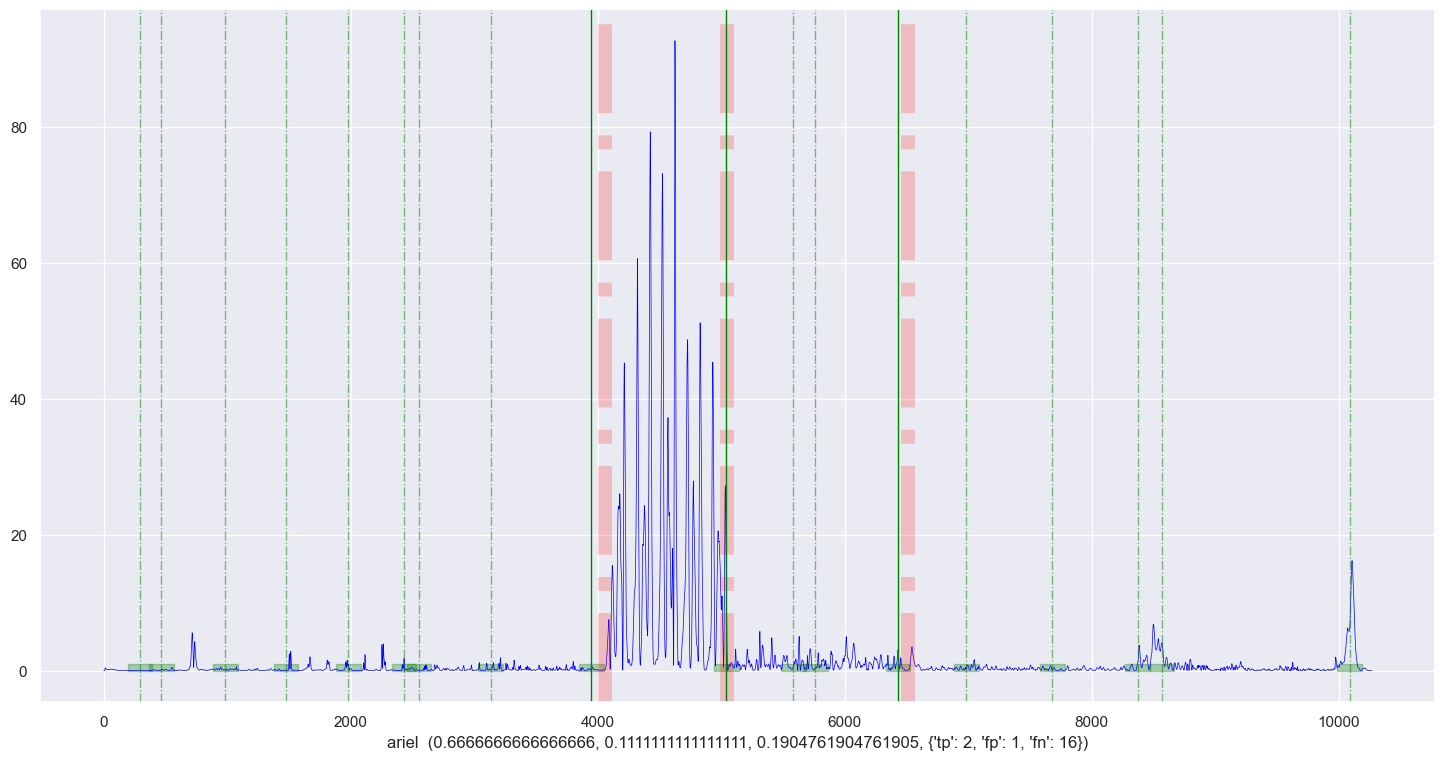

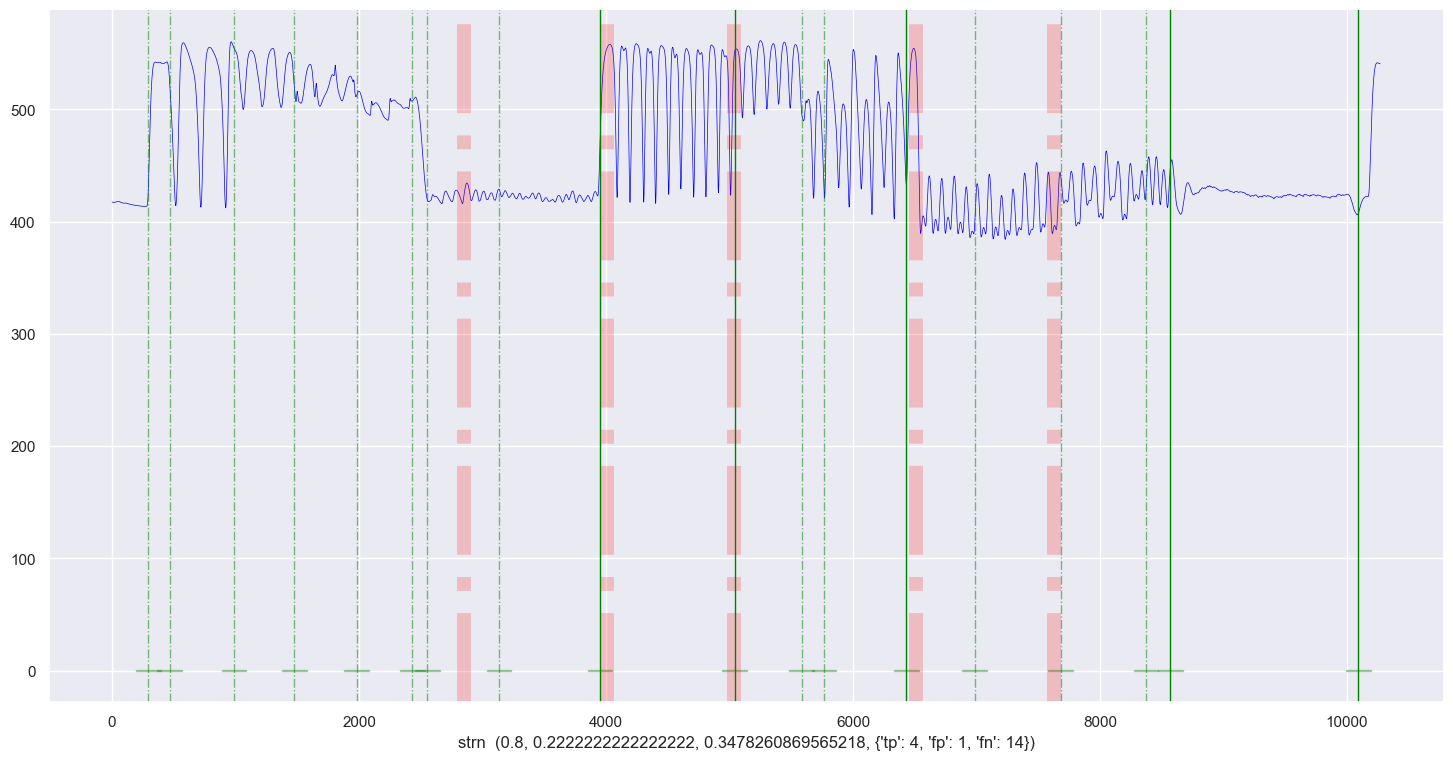

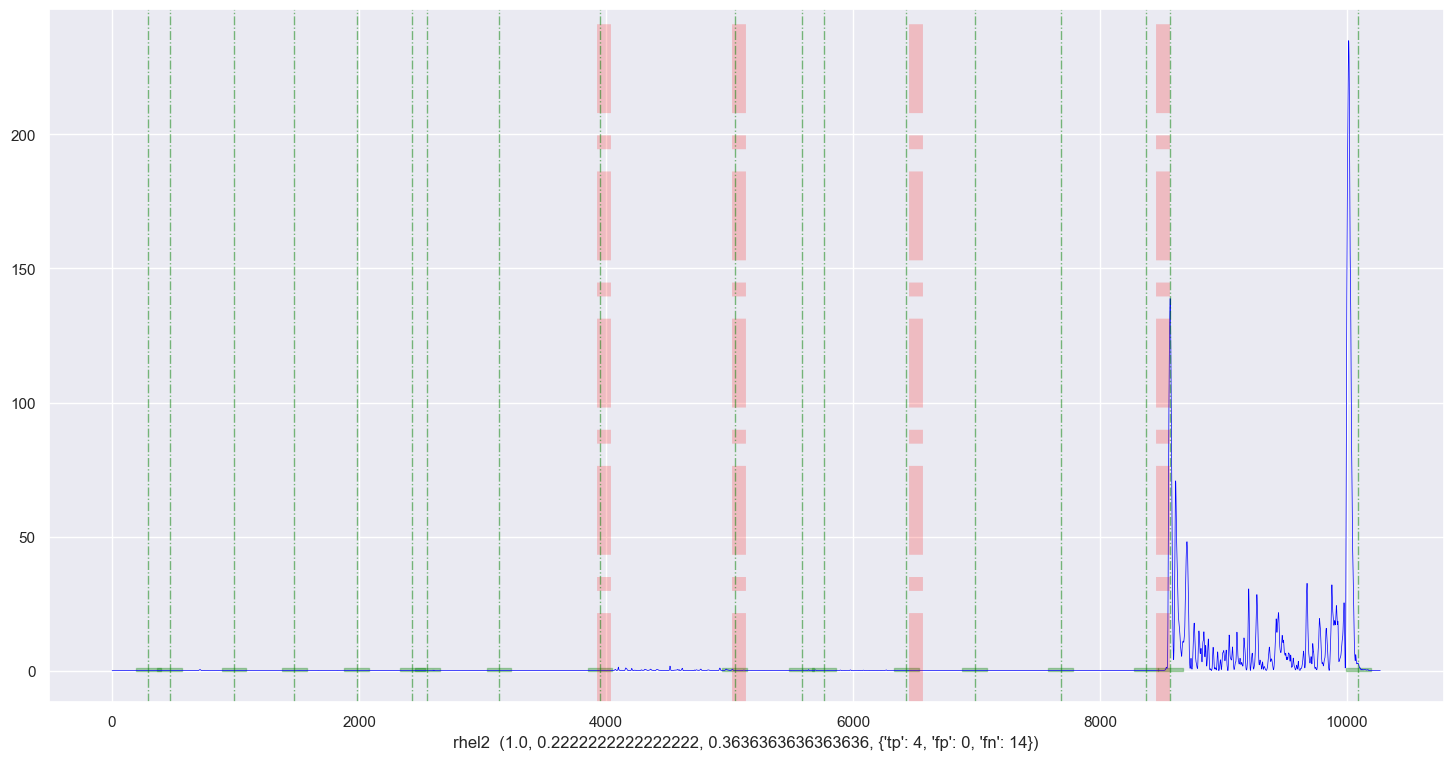

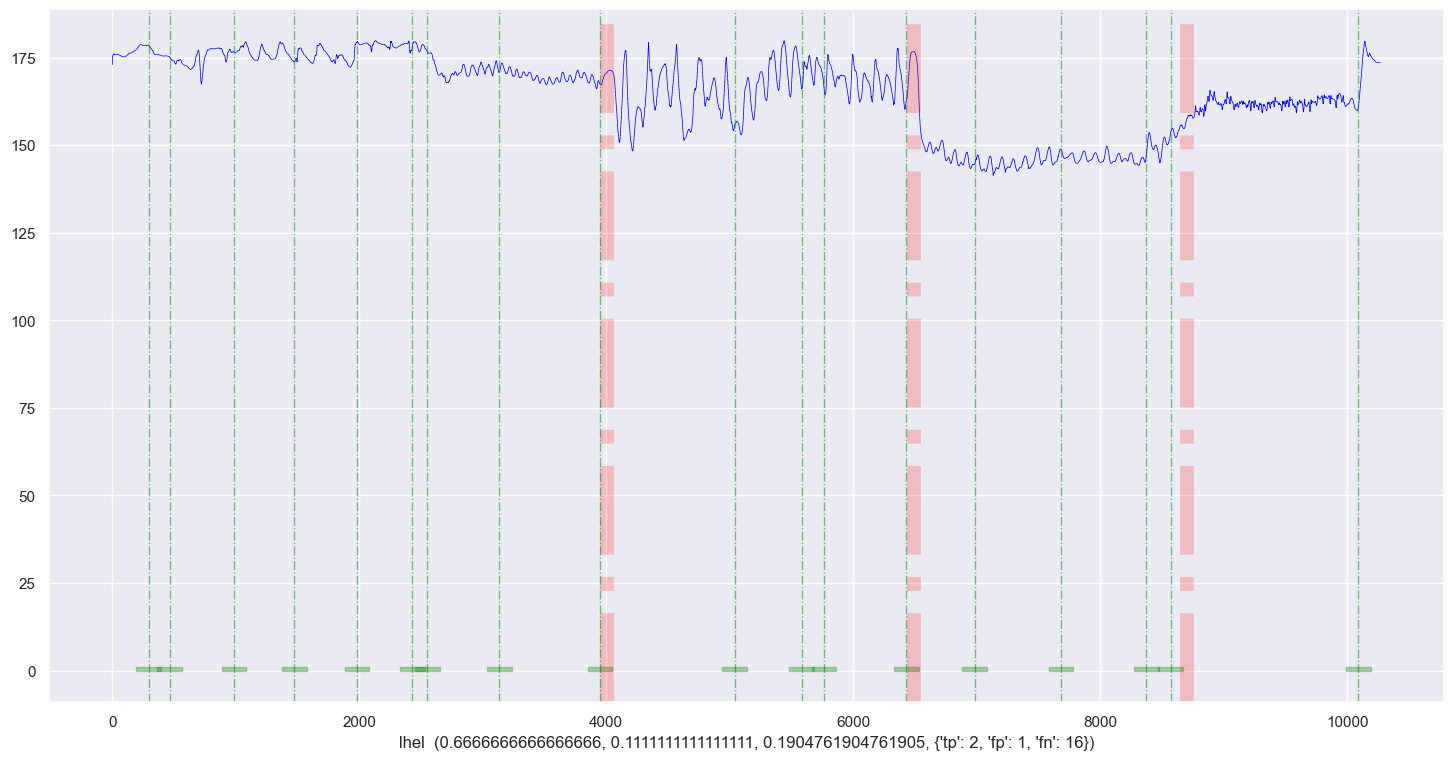

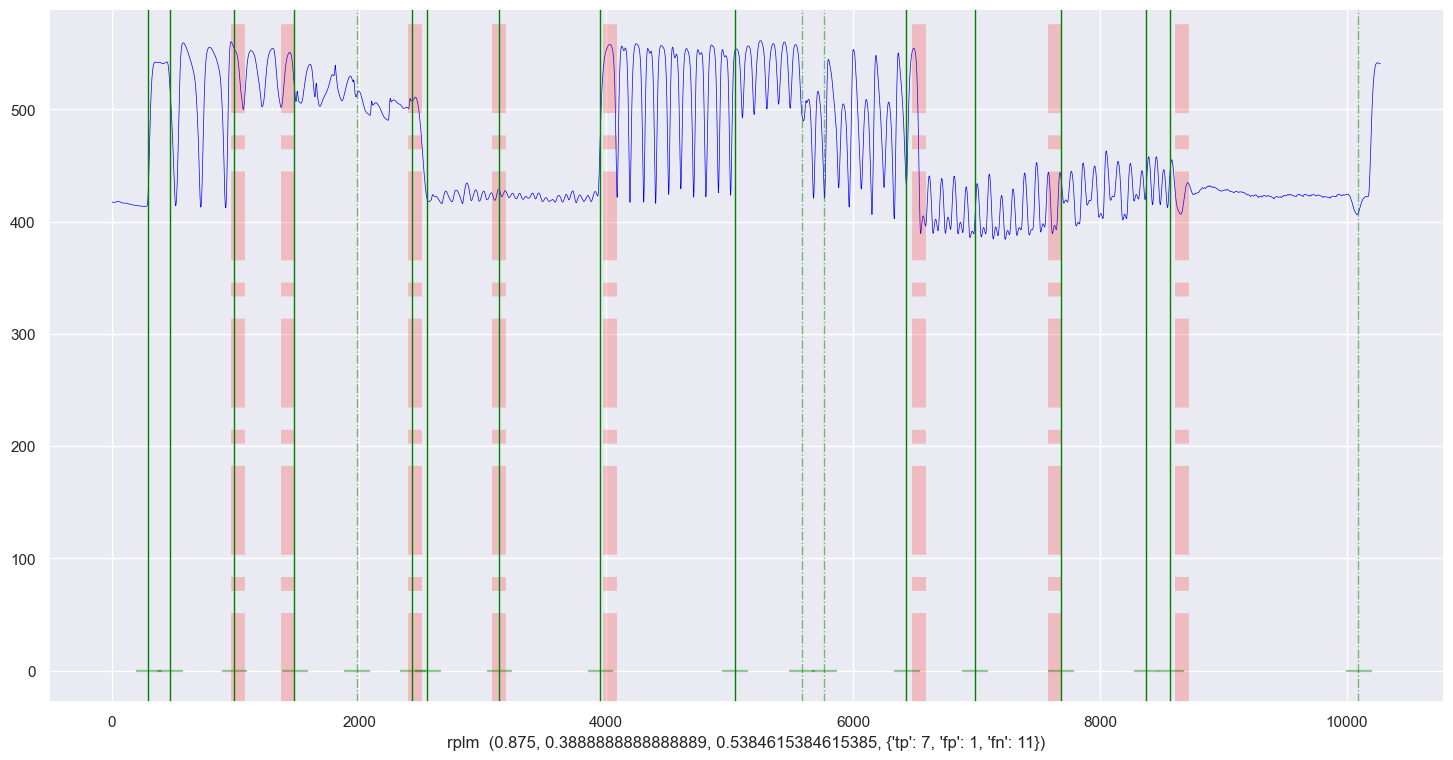

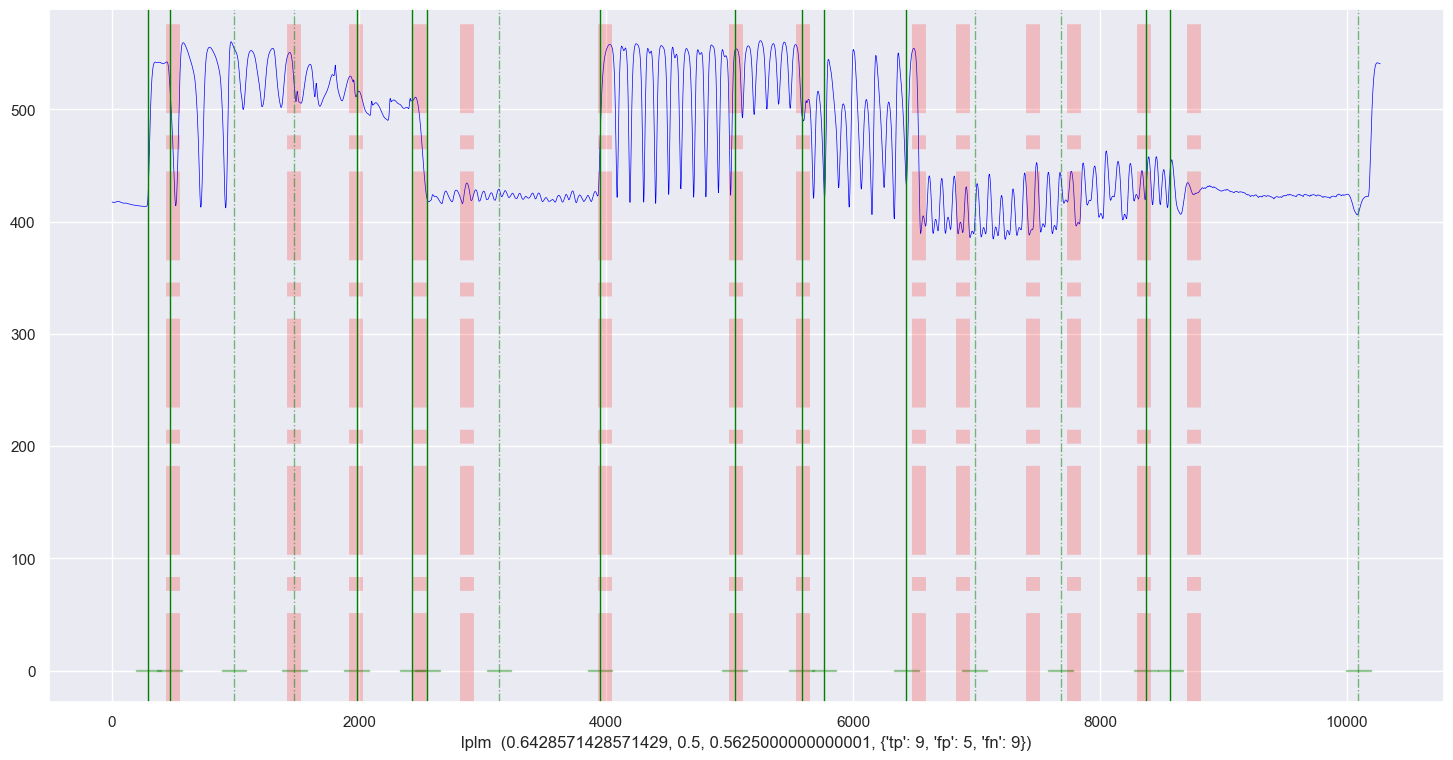

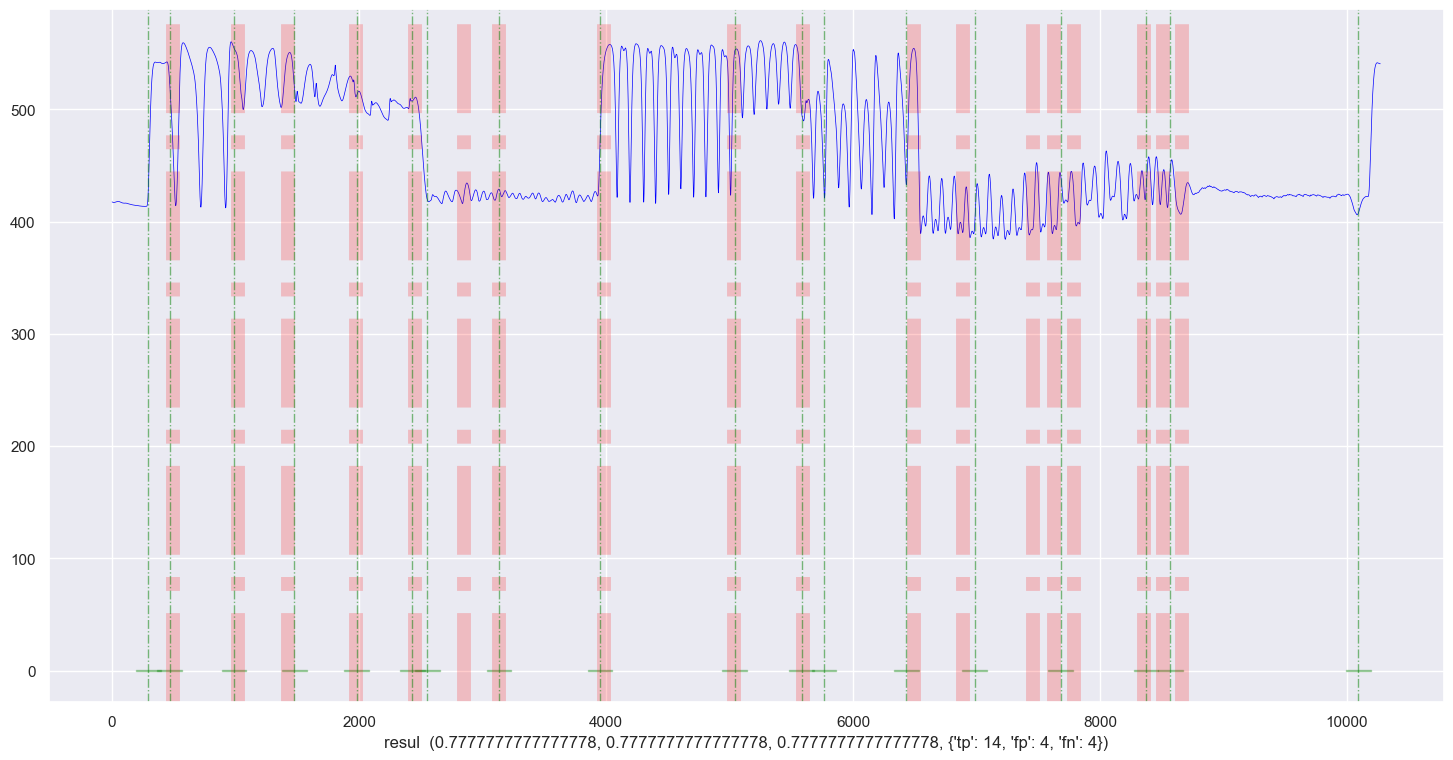

In [24]:
# esperimento dove mostra come con cora05 funziona molto bene andando a fare un majority voting alto
# però sugli altri video lo score diventa inferiore a 0.5
delnear_am=[]
majority_am=[]
cleaned_array = [s[3:-7] for s in timeseries]
resexcel=pd.DataFrame()
resexcel["name"] = cleaned_array
am=0
delnear_score=[]
majority_score=[]

    

for i in range(3,4):#len(timeseries)):
    h=4
    k=3
    # prendo i dati per il singolo video
    df=dfl[i]
    gt=gtl[i]
    cps=np.array(cpsl[i],dtype="object")


    vel=cps[[26,27,28,29]]
    acc=cps[[30,31,32,33]]
    jerk=cps[[34,35,36,37]]
    ariel = AndSal(100,5,*AndSal(100,k,*vel),*AndSal(100,k,*acc),*AndSal(100,k,*jerk),UnionCP(cps,2,8,14))
    PlotResult(df,gt,ariel,"ariel",100,"",8)

    vel=cps[[38,39,40,41]]
    acc=cps[[42,43,44,45]]
    jerk=cps[[46,47,48,49]]
    strn = AndSal(100,4,*AndSal(100,k,*vel),*AndSal(100,k,*acc),*AndSal(100,k,*jerk),UnionCP(cps,1,9))
    PlotResult(df,gt,strn,"strn",100,"",3)
    
    vel=cps[[50,51,52,53]]
    acc=cps[[54,55,56,57]]
    jerk=cps[[58,59,60,61]]
    rhel=AndSal(100,5,*AndSal(100,k,*vel),*AndSal(100,k,*acc),*AndSal(100,k,*jerk),UnionCP(cps,7,11,18,21))
    PlotResult(df,gt,rhel,"rhel2",100,"",7)

    vel=cps[[62,63,64,65]]
    acc=cps[[66,67,68,69]]
    jerk=cps[[70,71,72,73]]
    lhel=AndSal(100,5,*AndSal(100,k,*vel),*AndSal(100,k,*acc),*AndSal(100,k,*jerk),UnionCP(cps,6,10,19,20))
    PlotResult(df,gt,lhel,"lhel",100,"",19)

    vel=cps[[74,75,76,77]]
    acc=cps[[78,79,80,81]]
    jerk=cps[[82,83,84,85]]
    rplm=AndSal(100,5,*AndSal(100,k,*vel),*AndSal(100,k,*acc),*AndSal(100,k,*jerk),UnionCP(cps,5,13,23,25))
    PlotResult(df,gt,rplm,"rplm",100,"",3)

    vel=cps[[86,87,88,89]]
    acc=cps[[90,91,92,93]]
    jerk=cps[[94,95,96,97]]
    lplm=AndSal(100,5,*AndSal(100,2,*vel),*AndSal(100,2,*acc),*AndSal(100,2,*jerk),UnionCP(cps,4,12,22,24))
    PlotResult(df,gt,lplm,"lplm",100,"",3)

    # unisco il tutto in un unico array
    final = UnionCPS(ariel,strn,rhel,lhel,rplm,lplm)
    final = delnear(final,100)
    final = IgnoreZone(i,final,gt)
    PlotResult(df,gt,final,"resul",100,"",3)
           

       

neg:1 div:0 mean:0.42424242424242425
similiarty:2.5460368618024787
similiarty:3.790011347093357
similiarty:1.4005112065598238
similiarty:1.7092161065546256
similiarty:0.8621626713158924
similiarty:0.36588435816330167
similiarty:0.36435719299440733
similiarty:0.43259435974311133
similiarty:0.23071028039310895
similiarty:2.569058793597274
similiarty:1.3336624569588897
similiarty:0.06586354909218162
similiarty:0.0757910446756404
similiarty:0.09632714776130419
similiarty:4.394309196941266
similiarty:2.228363548171994
similiarty:1.8381177513598275
similiarty:2.46359722986279
similiarty:1.9578480218388983
similiarty:0.5080253389226927
similiarty:2.0060216331310197
similiarty:1.1798906019151723
similiarty:0.8892419088493947
similiarty:1.265849891527313
similiarty:1.5561643481006557
similiarty:2.4306589679765533
similiarty:1.9518929435810402
similiarty:1.2557466341520178
similiarty:2.010907138535723
similiarty:2.1090684331619483
similiarty:0.23308154769808045
similiarty:0.6950111589308451
simi

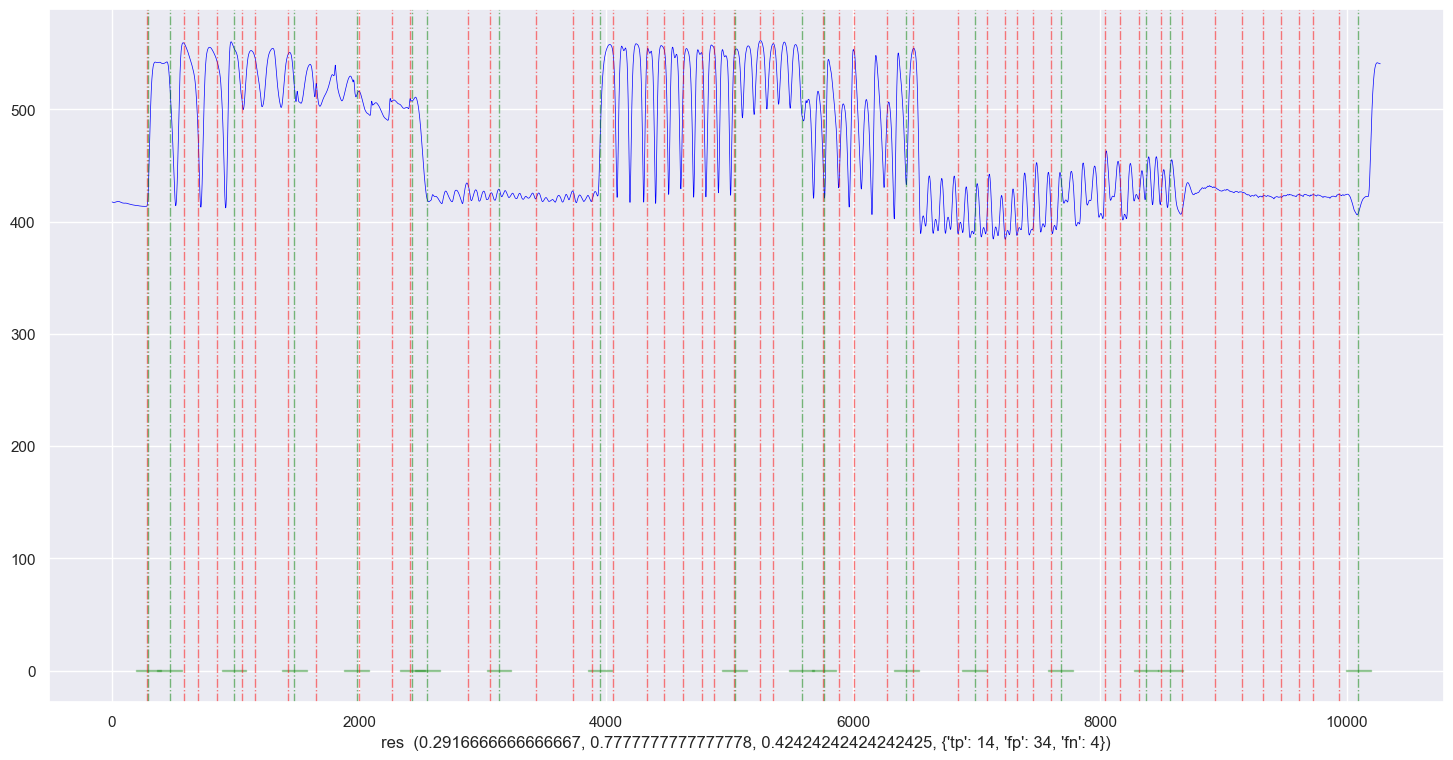

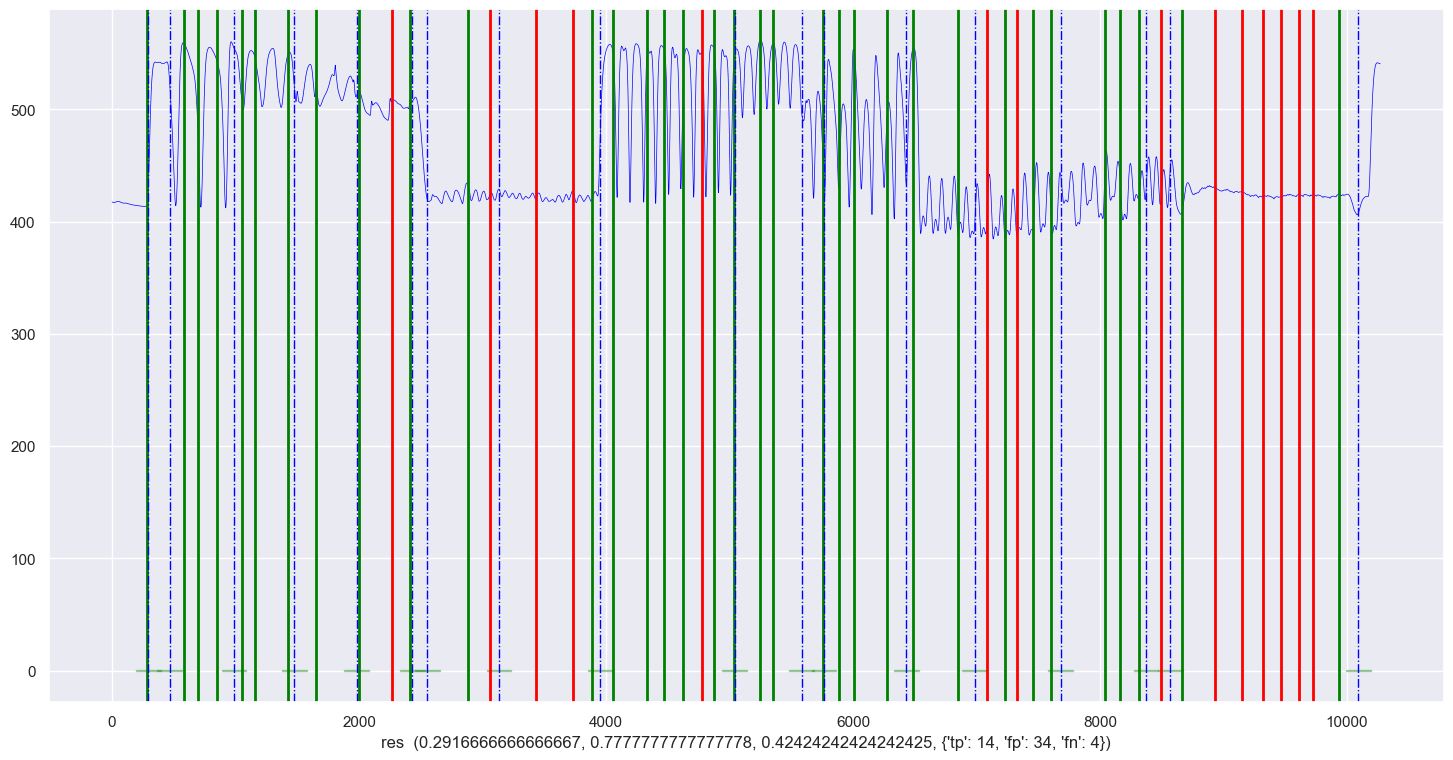

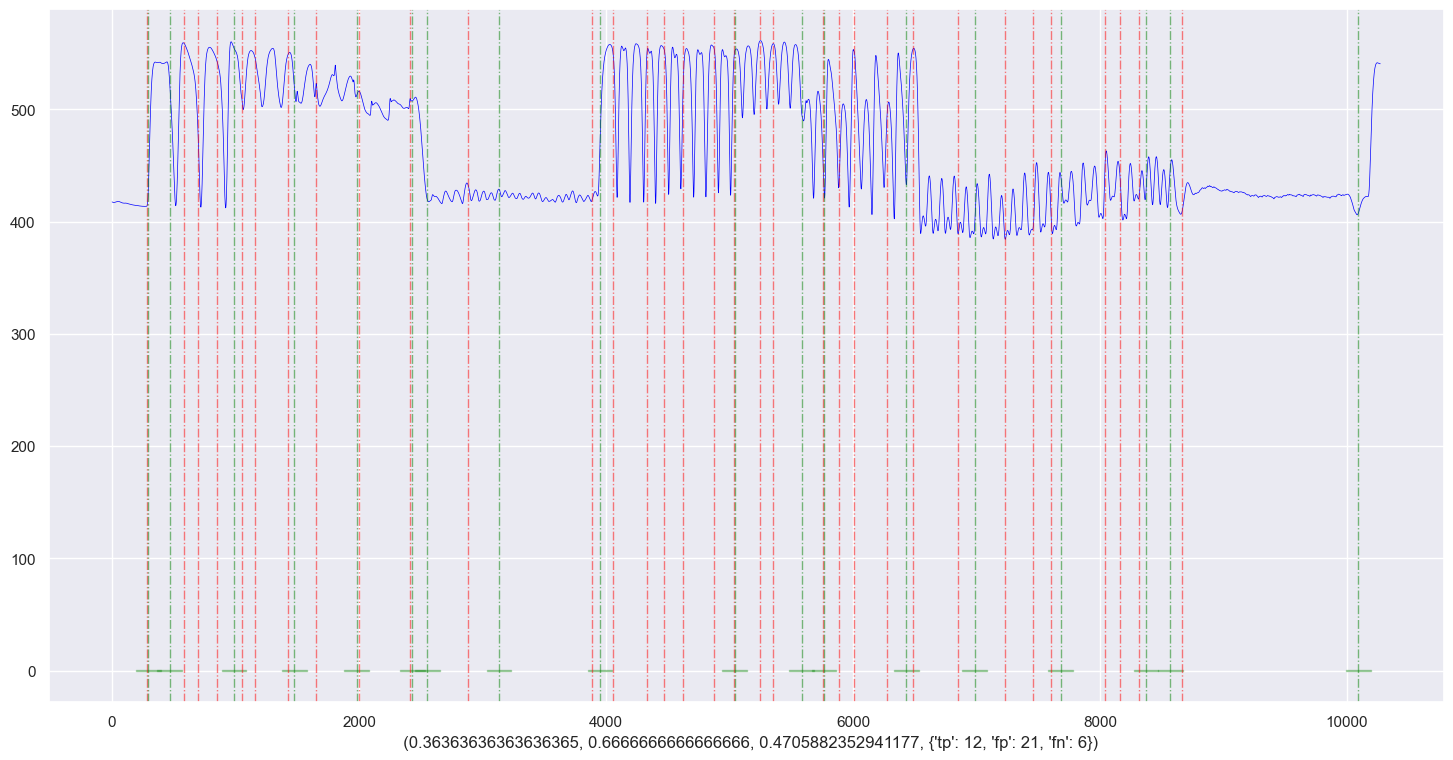

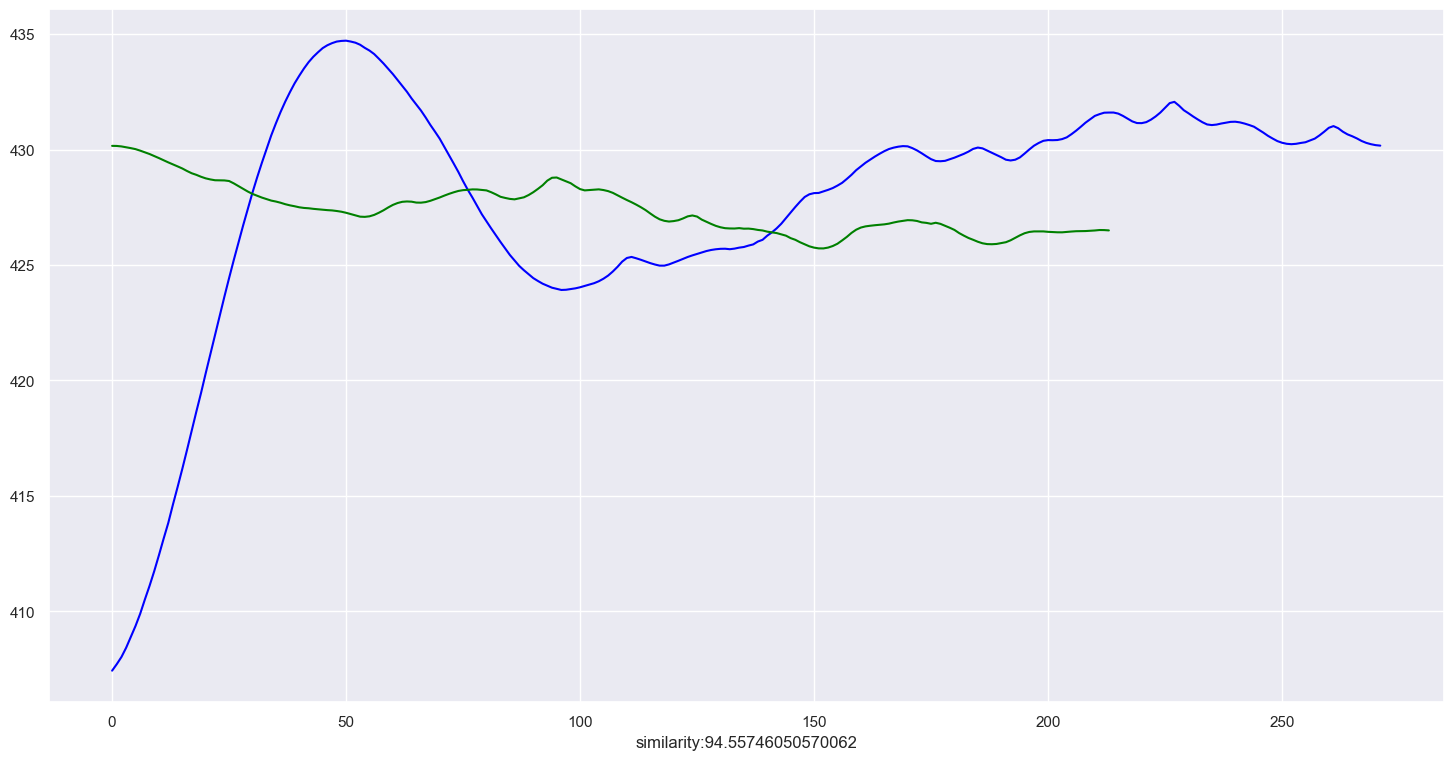

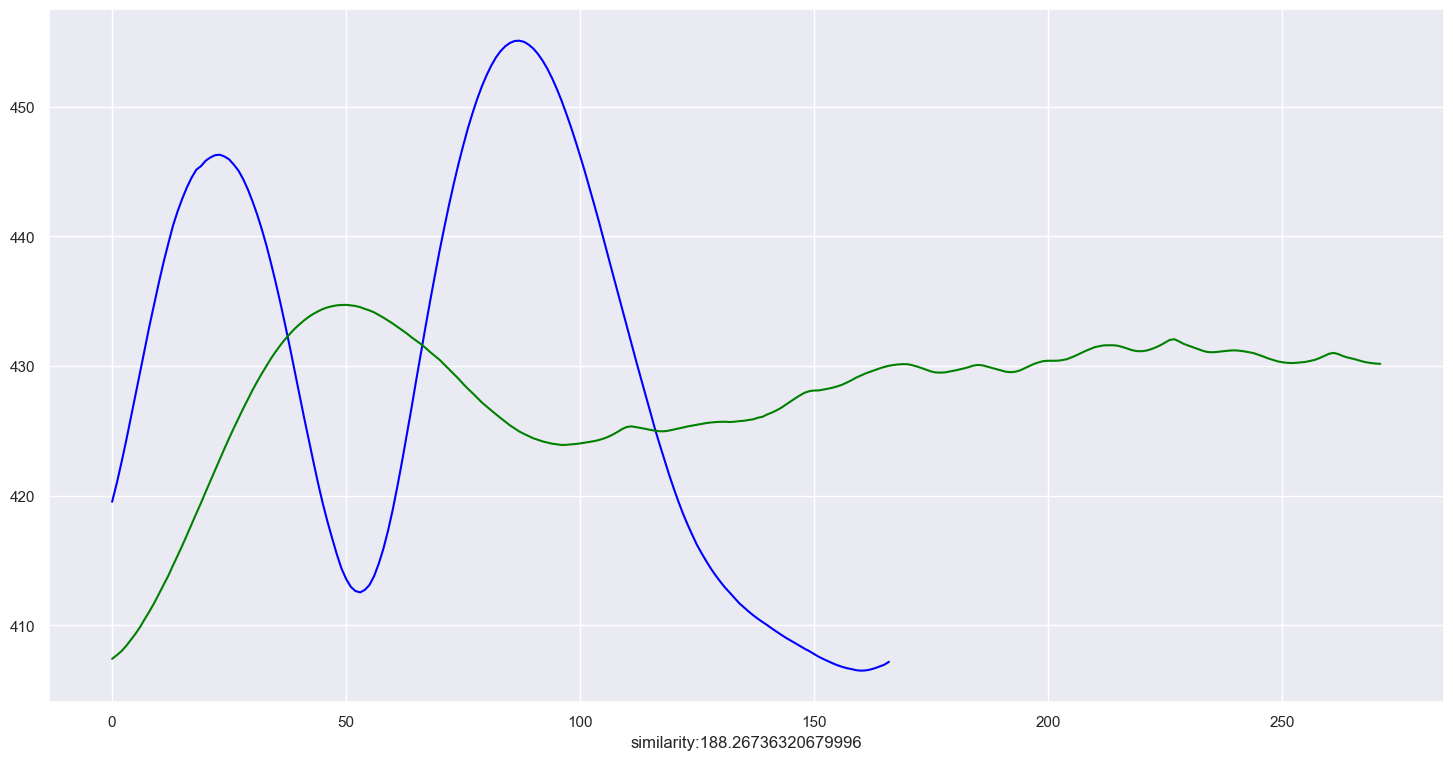

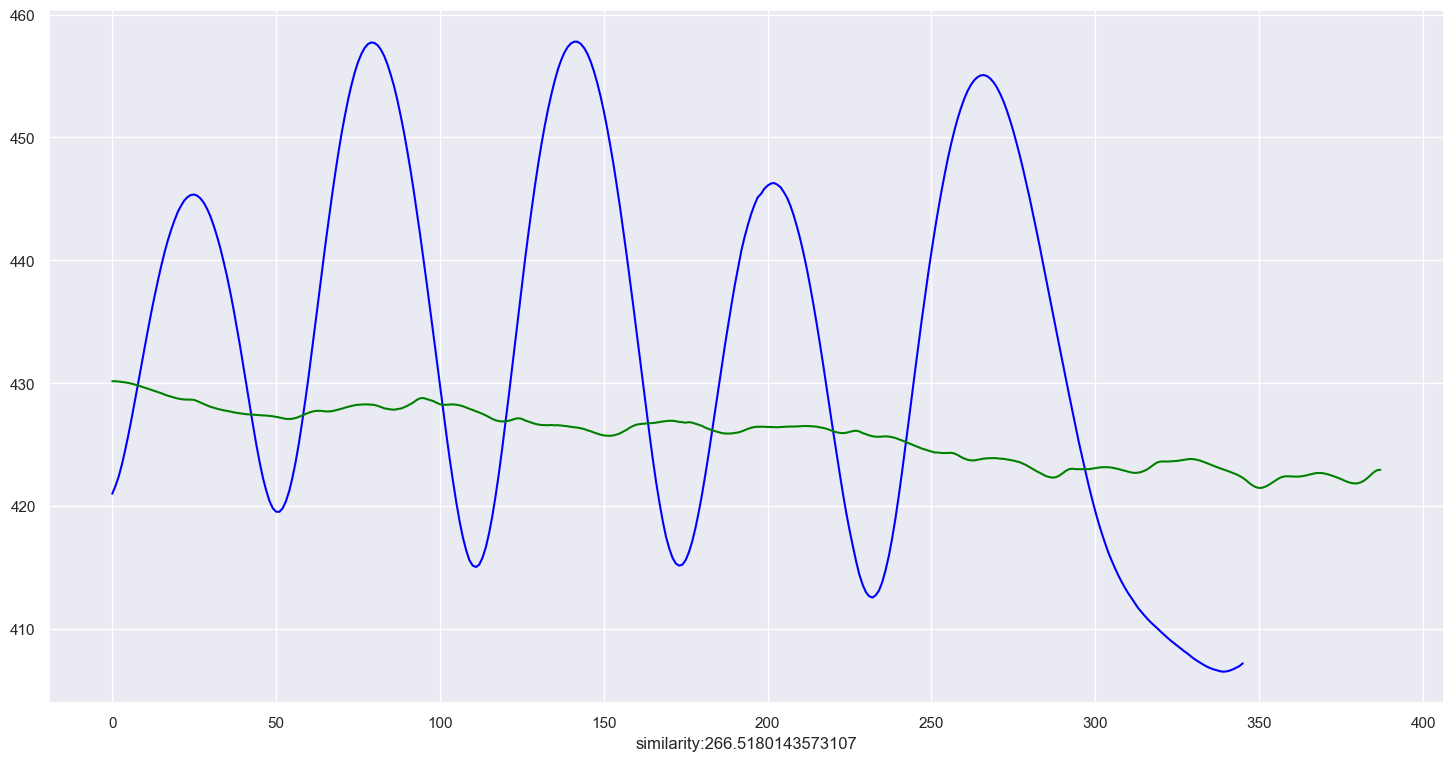

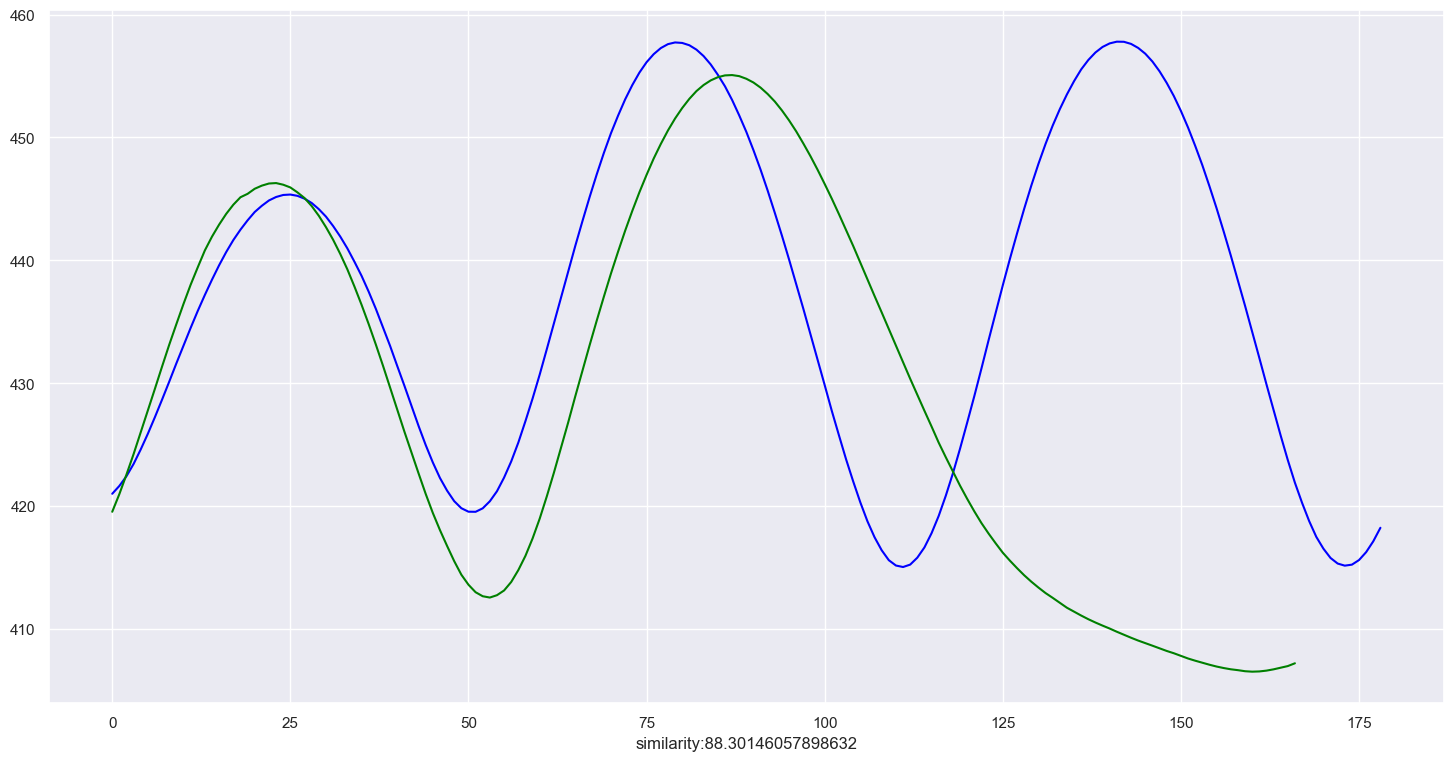

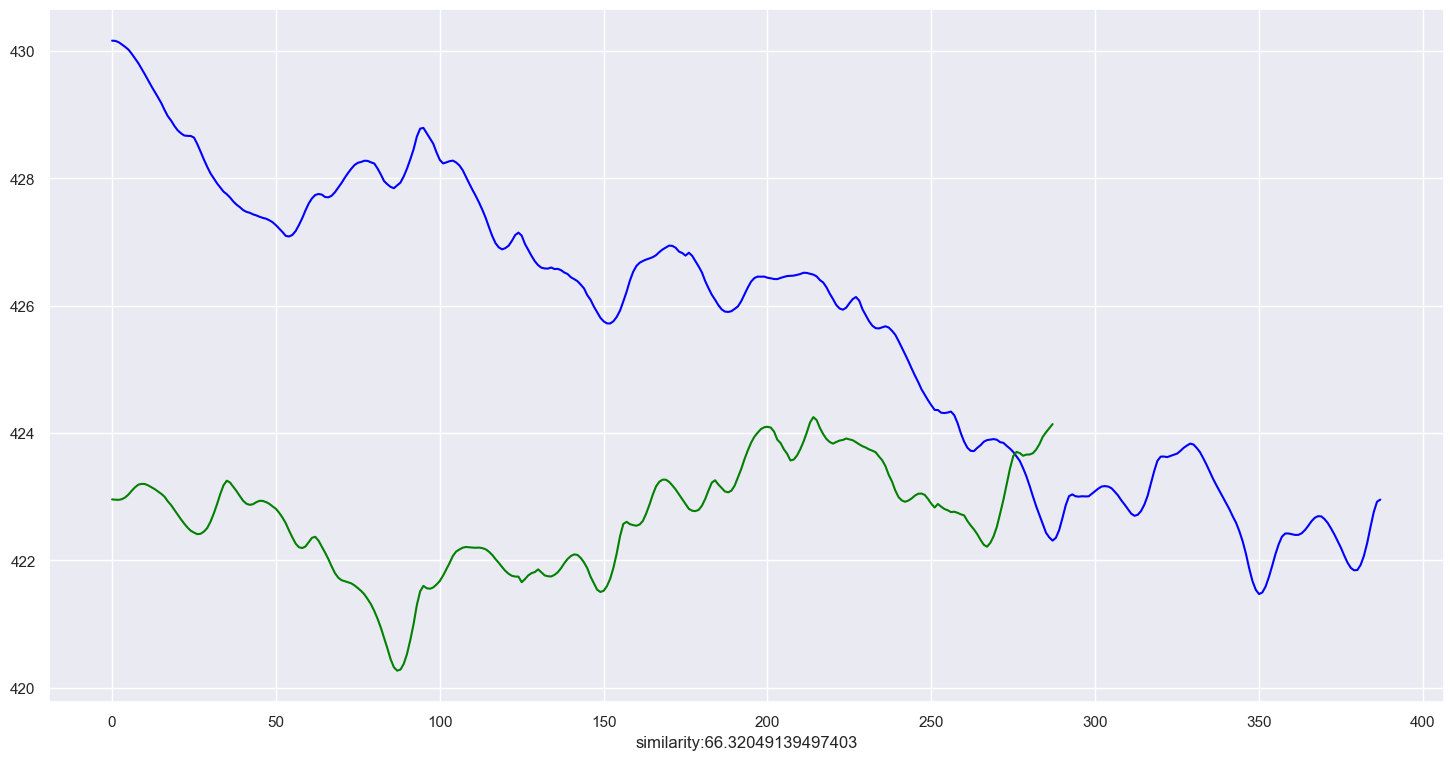

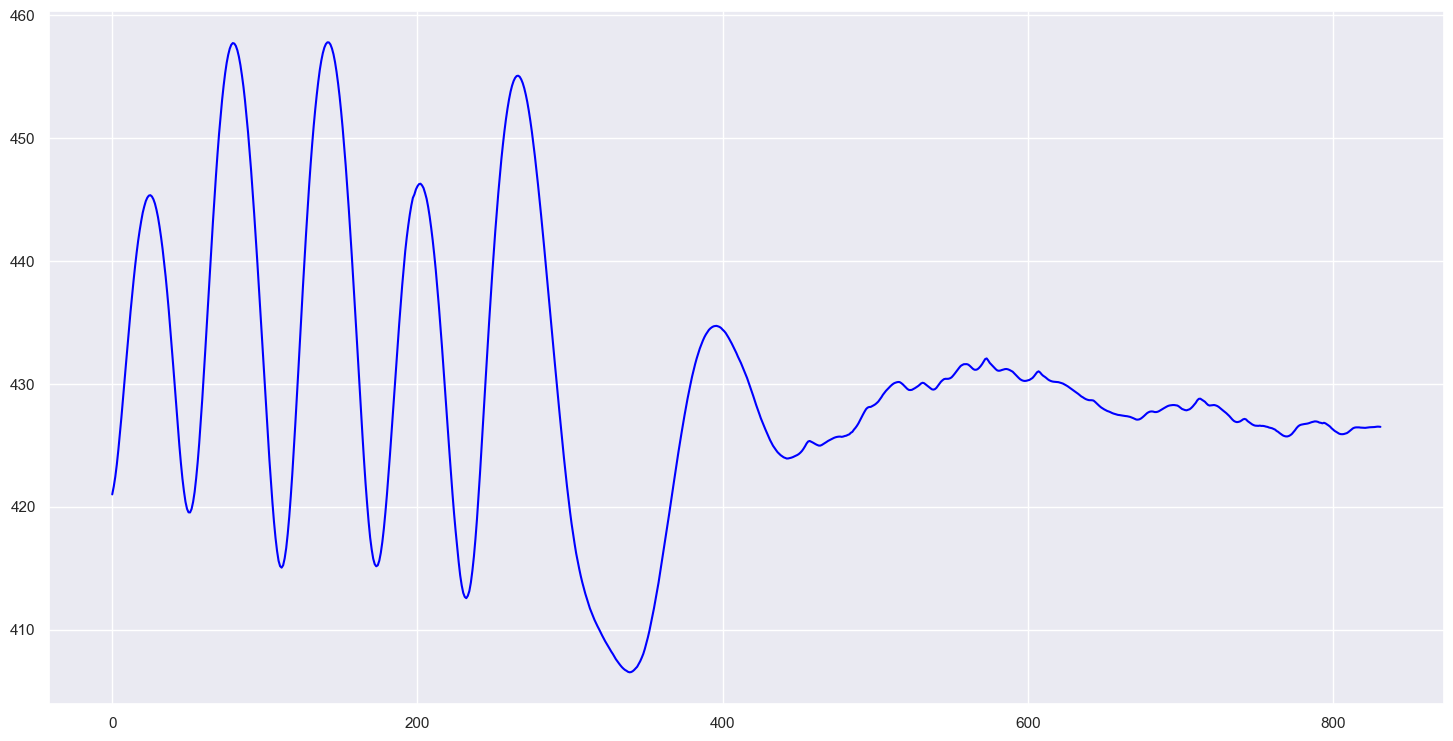

In [62]:
# studio del DTW per togliere FP
# notare dal risultato che non otteniamo uno score di similarità come ci aspettavamo
# bisogna usare un altro strumento simile ma diverso dal DTW
for div in range(0,1):
    neg=0
    f1_list=[]
    for i in range(3,4):
        
        df=dfl[i]
        gt=gtl[i]
        cps=np.array(cpsl[i],dtype="object")

        ariel_el=[26,27,28,29,30,31,32,33,34,35,36,37,2,8,14]
        ariel = UnionCPS(*cps[ariel_el])


        strn_el=[38,39,40,41,42,43,44,45,46,47,48,49,1,9]
        strn = UnionCPS(*cps[strn_el])

        rhel_el=[50,51,52,53,54,55,56,57,58,59,60,61,7,11,18,21]
        rhel = UnionCPS(*cps[rhel_el])

        lhel_el=[6,10,19,20,62,63,64,65,66,67,68,69,70,71,72,73]
        lhel = UnionCPS(*cps[lhel_el])
        
        rplm_el=[74,75,76,77,78,79,80,81,82,83,84,85,5,13,23,25]
        rplm = UnionCPS(*cps[rplm_el])

        lplm_el=[4,12,22,24,86,87,88,89,90,91,92,93,94,95,96,97]
        lplm = UnionCPS(*cps[lplm_el])
    
      
        ariel = MajorityVoteCP(ariel,100,div)#math.ceil(len(ariel_el)/div))
        strn = MajorityVoteCP(strn,100,div)#math.ceil(len(strn_el)/div))
        rhel = MajorityVoteCP(rhel,100,div)#math.ceil(len(rhel_el)/div))
        lhel = MajorityVoteCP(lhel,100,div)#math.ceil(len(lhel_el)/div))
        rplm = MajorityVoteCP(rplm,100,div)#math.ceil(len(rplm_el)/div))
        lplm = MajorityVoteCP(lplm,100,div)#math.ceil(len(lplm_el)/div))
        res = UnionCPS(ariel,strn,rhel,lhel,rplm,lplm)
        res = IgnoreZone(i,res,gt)
        res = delnear(res,100)
        _,_,f1,_=f1scoremargin(gt,res,100)
        if f1 < 0.5:
            neg+=1
        f1_list.append(f1)
        #print(f'{timeseries[i]} f1:{f1}')
    print(f'neg:{neg} div:{div} mean:{sum(f1_list)/len(f1_list)}')
    
    PlotResult(df,gt,res,"res",100,"",3)
    
    to_color=[]
    filtered=[res[0]]
    for i in range(0,len(res)-2):
        lo=df.iloc[:,3].values[int(res[i]):int(res[i+1])]
        hi=df.iloc[:,3].values[int(res[i+1]):int(res[i+2])]
        
        distance, paths = dtw.warping_paths(lo, hi, use_c=False)
        best_path = dtw.best_path(paths)
        similarity_score = distance / len(best_path)
        if distance <= 100:
            to_color.append(i+1)
        else:
            filtered.append(res[i+1])
        
        print(f'similiarty:{similarity_score}')
        
    PlotResultColored(df,gt,res,to_color,"res",100,"",3)
    PlotResult(df,gt,np.array(filtered),"",100,"",3)

    subplt1=df.iloc[:,3].values[int(res[40]):int(res[41])]
    subplt2=df.iloc[:,3].values[int(res[41]):int(res[42])]
    plt.figure(figsize=(18,9))
    plt.plot(np.arange(len(subplt1)), subplt1, "blue")
    plt.plot(np.arange(len(subplt2)), subplt2, "green")
    distance, paths = dtw.warping_paths(subplt1, subplt2, use_c=False)
    best_path = dtw.best_path(paths)
    similarity_score = distance / len(best_path)
    plt.xlabel(f'similarity:{distance}')

    subplt1=df.iloc[:,3].values[int(res[39]):int(res[40])]
    subplt2=df.iloc[:,3].values[int(res[40]):int(res[41])]
    plt.figure(figsize=(18,9))
    plt.plot(np.arange(len(subplt1)), subplt1, "blue")
    plt.plot(np.arange(len(subplt2)), subplt2, "green")
    distance, paths = dtw.warping_paths(subplt1, subplt2, use_c=False)
    best_path = dtw.best_path(paths)
    similarity_score = distance / len(best_path)
    plt.xlabel(f'similarity:{distance}')

    subplt1=df.iloc[:,3].values[int(res[38]):int(res[40])]
    subplt2=df.iloc[:,3].values[int(res[41]):int(res[43])]
    plt.figure(figsize=(18,9))
    plt.plot(np.arange(len(subplt1)), subplt1, "blue")
    plt.plot(np.arange(len(subplt2)), subplt2, "green")
    distance, paths = dtw.warping_paths(subplt1, subplt2, use_c=False)
    best_path = dtw.best_path(paths)
    similarity_score = distance / len(best_path)
    plt.xlabel(f'similarity:{distance}')

    subplt1=df.iloc[:,3].values[int(res[38]):int(res[39])]
    subplt2=df.iloc[:,3].values[int(res[39]):int(res[40])]
    plt.figure(figsize=(18,9))
    plt.plot(np.arange(len(subplt1)), subplt1, "blue")
    plt.plot(np.arange(len(subplt2)), subplt2, "green")
    distance, paths = dtw.warping_paths(subplt1, subplt2, use_c=False)
    best_path = dtw.best_path(paths)
    similarity_score = distance / len(best_path)
    plt.xlabel(f'similarity:{distance}')

    subplt1=df.iloc[:,3].values[int(res[41]):int(res[43])]
    subplt2=df.iloc[:,3].values[int(res[43]):int(res[45])]
    plt.figure(figsize=(18,9))
    plt.plot(np.arange(len(subplt1)), subplt1, "blue")
    plt.plot(np.arange(len(subplt2)), subplt2, "green")
    distance, paths = dtw.warping_paths(subplt1, subplt2, use_c=False)
    best_path = dtw.best_path(paths)
    similarity_score = distance / len(best_path)
    plt.xlabel(f'similarity:{distance}')

    subplt3=df.iloc[:,3].values[int(res[38]):int(res[42])]
    plt.figure(figsize=(18,9))
    plt.plot(np.arange(len(subplt3)), subplt3, "blue")
 
    """
    PlotResult(df,gt,ariel,"ariel",100,"",3)
    PlotResult(df,gt,strn,"strn",100,"",3)
    PlotResult(df,gt,rhel,"rhel",100,"",3)
    PlotResult(df,gt,lhel,"lhel",100,"",3)
    PlotResult(df,gt,rplm,"rplm",100,"",3)
    PlotResult(df,gt,lplm,"lplm",100,"",3)
    PlotResult(df,gt,res,"res",100,"",3)
    """
    

10271